In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [61]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [62]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [63]:
df.describe(include='O')

,Gender
count,400
unique,2
top,Female
freq,204


In [64]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [65]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [66]:
df1=df[(df.Gender=='Female')&(df.Purchased==1)]
df1.value_counts()

User ID   Gender  Age  EstimatedSalary  Purchased
15569641  Female  58   95000            1            1
15736760  Female  47   49000            1            1
15753861  Female  49   141000           1            1
15753102  Female  35   97000            1            1
15750839  Female  27   96000            1            1
                                                    ..
15663249  Female  52   21000            1            1
15660866  Female  58   101000           1            1
15654296  Female  50   20000            1            1
15654230  Female  55   130000           1            1
15815236  Female  45   131000           1            1
Length: 77, dtype: int64

In [67]:
df1.count() 

User ID            77
Gender             77
Age                77
EstimatedSalary    77
Purchased          77
dtype: int64

In [68]:
df1.duplicated().sum()

0

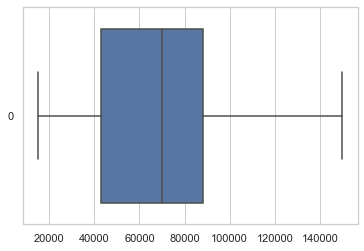

In [69]:
sns.set(style="whitegrid")
ax=sns.boxplot(data=df['EstimatedSalary'],orient="h")

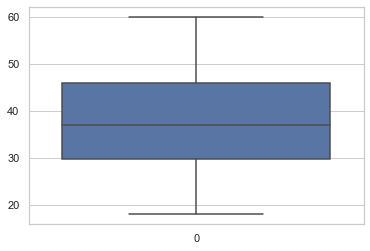

In [70]:
sns.set(style="whitegrid")
ax=sns.boxplot(data=df['Age'],orient="v")

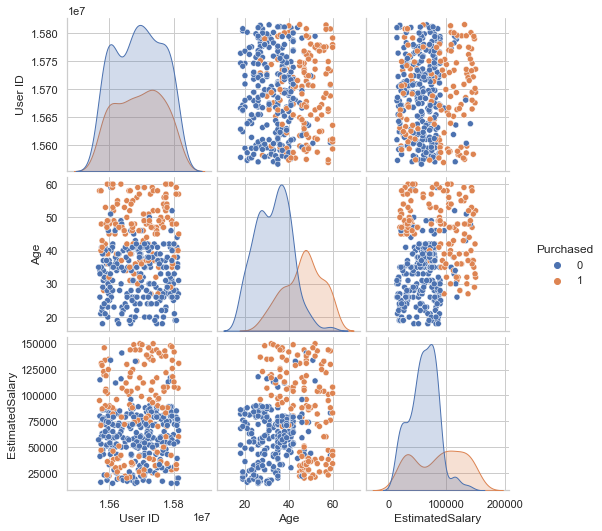

In [71]:
sns.pairplot(df, hue='Purchased')

In [72]:
df.drop(columns=['User ID'],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [73]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df.Gender=labelencoder.fit_transform(df.Gender)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [74]:
feature_cols = ['Gender','Age','EstimatedSalary']
x =df[feature_cols]
y=df['Purchased']

In [75]:
x.head(3)

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000


In [76]:
x=x.values
y=y.values

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [78]:
x_test.shape

(80, 3)

In [79]:
x_train.shape

(320, 3)

In [80]:
y_test.shape

(80,)

In [81]:
df.shape

(400, 4)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [83]:
type(x_train_sc)

numpy.ndarray

In [84]:
x_train_sc[:,2].mean()

1.1102230246251566e-17

In [85]:
x_train_sc[:,2].std()

0.9999999999999998

In [86]:
x_train[:,2].mean()

69928.125

In [87]:
x_train[:,2].std()

34515.999318929986

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
y_pred_knn =knn.predict(x_test_sc)

In [90]:
for i in range (len(y_test)):
    if y_test[i] != y_pred_knn[i]:
        print(i,y_test[i], y_pred_knn[i])
    

9 0 1
15 0 1
31 1 0
53 0 1


In [91]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix knn\n', confusion_matrix(y_test,y_pred_knn))


Confusion matrix knn
 [[55  3]
 [ 1 21]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


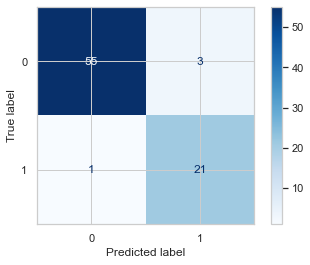

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test_sc, y_test, cmap='Blues')



In [93]:
from sklearn.metrics import f1_score
print('F1 score knn :', f1_score(y_test,y_pred_knn,average=None))

    

F1 score knn : [0.96491228 0.91304348]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [95]:
from sklearn.metrics import f1_score
print('F1 score knn :', f1_score(y_test,y_pred_knn,average='macro'))

    

F1 score knn : 0.938977879481312


In [96]:
New_Buyer=[[1,20,35000]]
N_sc=scaler.transform(New_Buyer)
N_sc

array([[ 1.02532046, -1.77105829, -1.01194013]])

In [97]:
y_pred_N=knn.predict(N_sc)
y_pred_N


array([0], dtype=int64)

In [98]:
knn= KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list (range(1,10))
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',verbose=1)
grid_search=grid.fit(x_train_sc,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [99]:
accuracy =grid_search.best_score_*100
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 89.6875


In [100]:
K_best=grid_search.best_params_['n_neighbors']
K_best

5

In [101]:
from sklearn.tree import DecisionTreeClassifier
Dt= DecisionTreeClassifier()
Dt.fit(x_train,y_train)
y_pred_DT = Dt.predict(x_test)
y_pred_DT


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [102]:
print(classification_report (y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



[Text(0.45089285714285715, 0.9666666666666667, 'X[1] <= 44.5\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.23809523809523808, 0.9, 'X[2] <= 90500.0\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.16666666666666666, 0.8333333333333334, 'X[1] <= 36.5\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.14285714285714285, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.19047619047619047, 0.7666666666666667, 'X[2] <= 83500.0\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.16666666666666666, 0.7, 'X[2] <= 67500.0\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.14285714285714285, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.19047619047619047, 0.6333333333333333, 'X[2] <= 70500.0\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.16666666666666666, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.5666666666666667, 'X[1] <= 41.5\ngini = 0.278\nsa

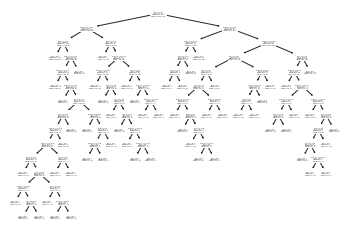

In [103]:
from sklearn.tree import plot_tree
plot_tree(Dt)

In [104]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(Dt,feature_names = df.columns[:-1],out_file ='dt_ML.dot',label='all',filled = True,rounded = True)

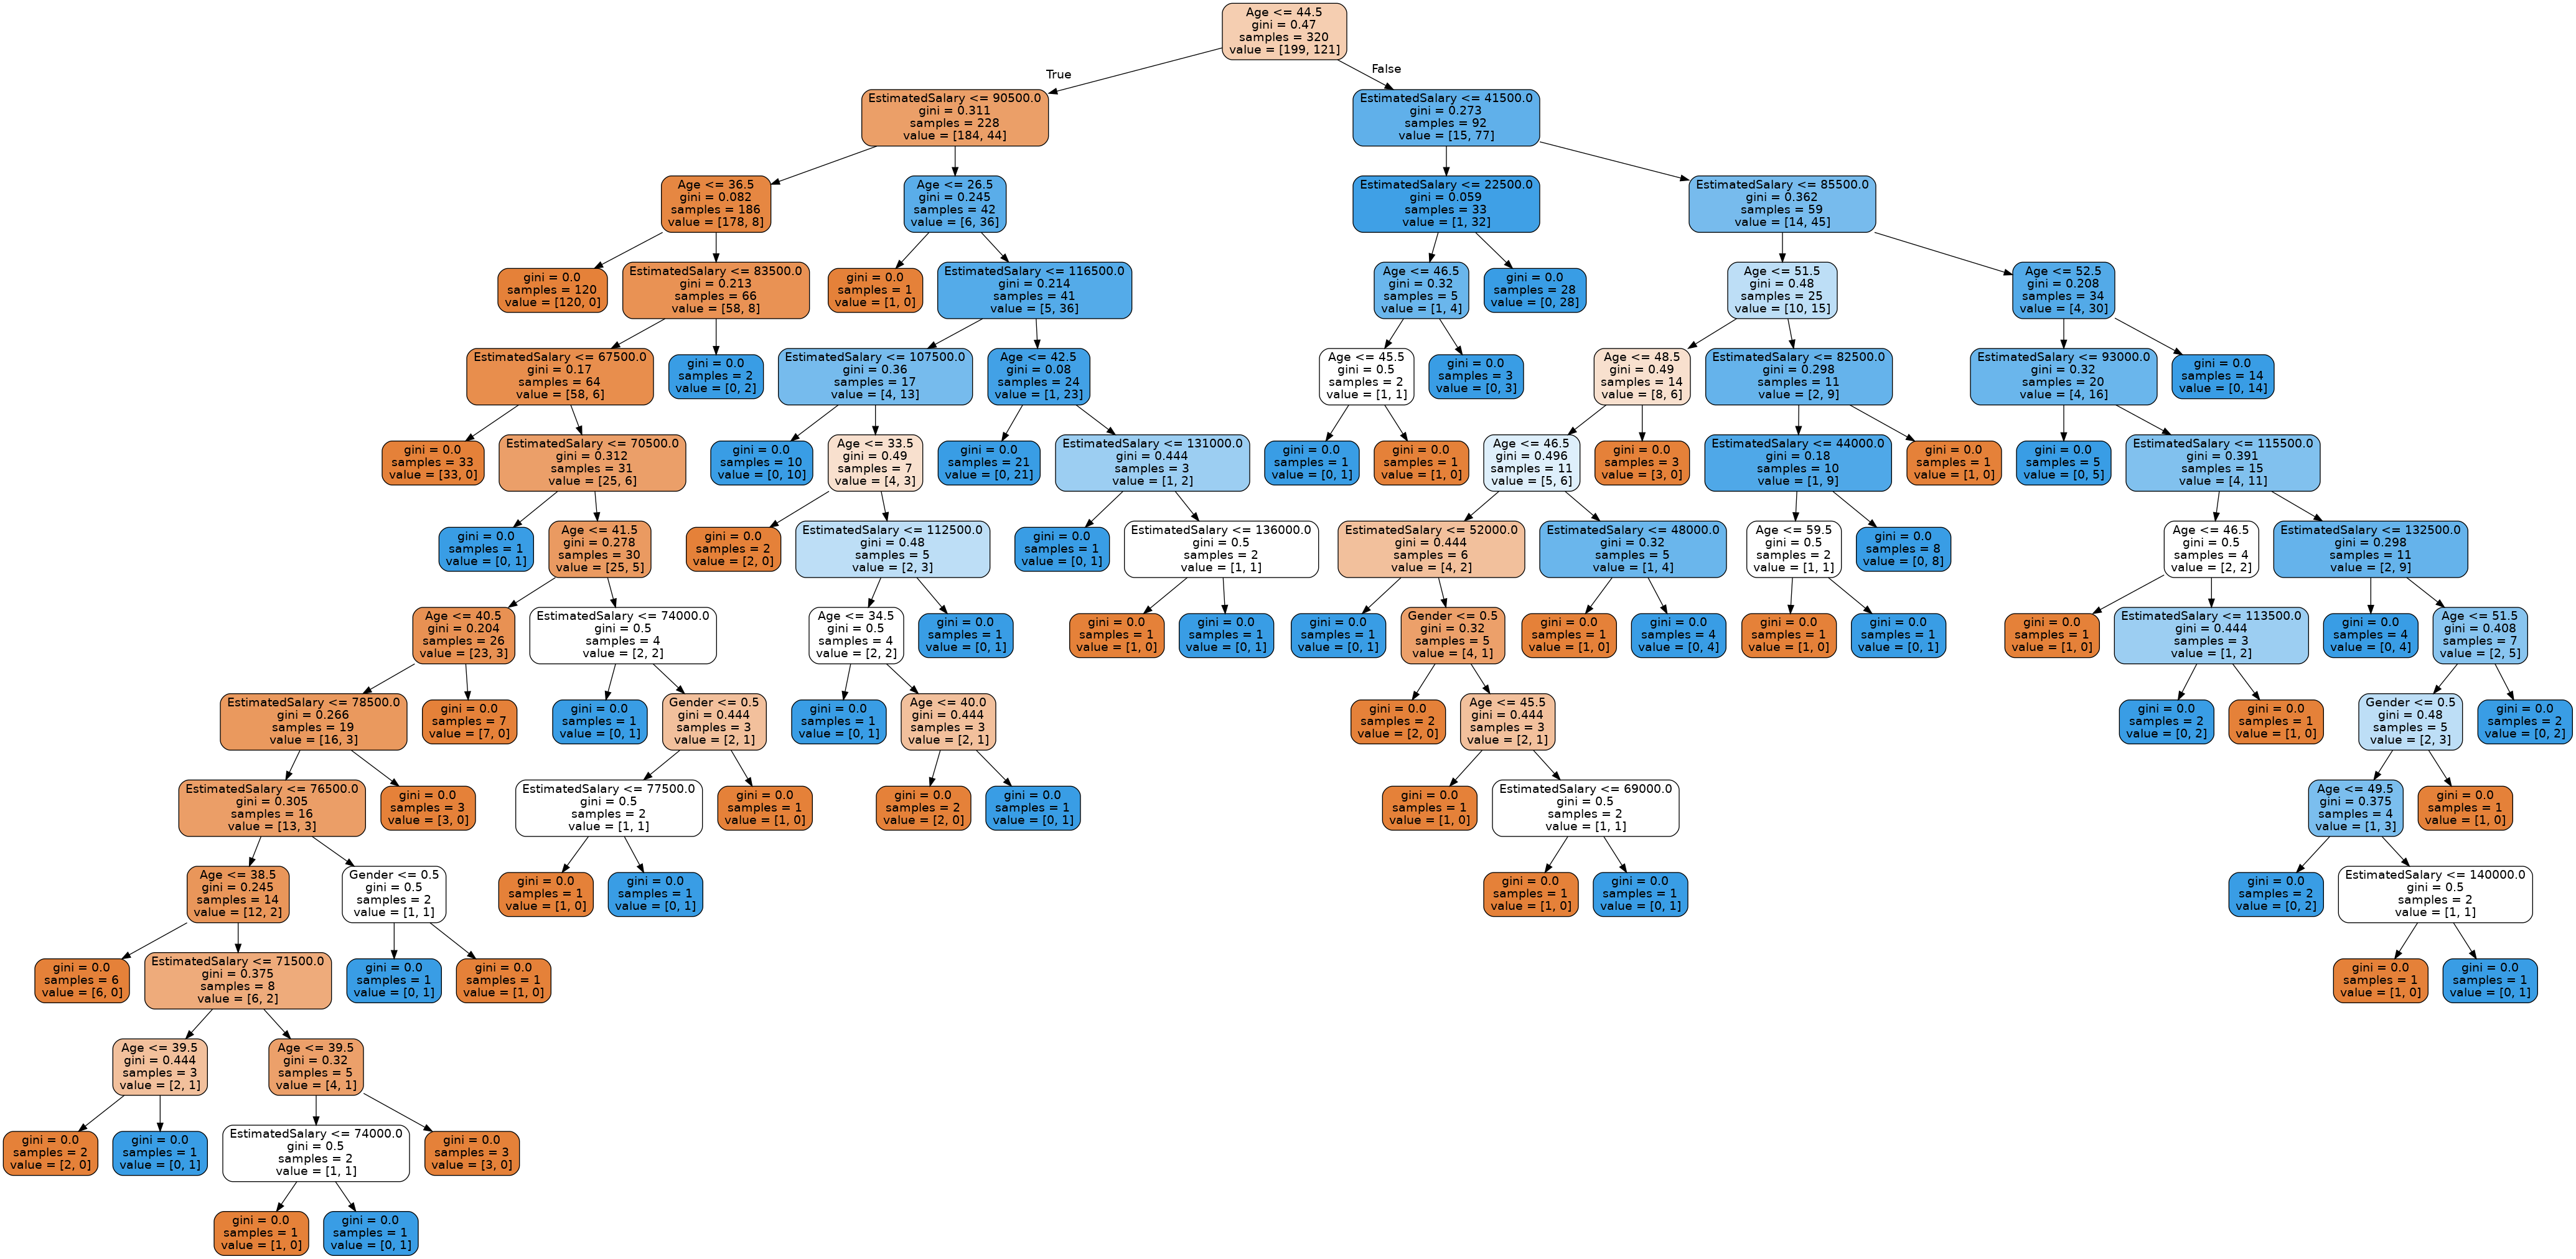

In [109]:
from IPython.display import Image
Image("dt-ml.png",width=800)


In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [112]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [118]:
importances = rf.feature_importances_
features=df.columns[sorted_idx]
features

Index(['Gender', 'EstimatedSalary', 'Age'], dtype='object')

In [116]:
import numpy as np
sorted_idx=np.argsort(importances)
sorted_idx

array([0, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Variable importance')

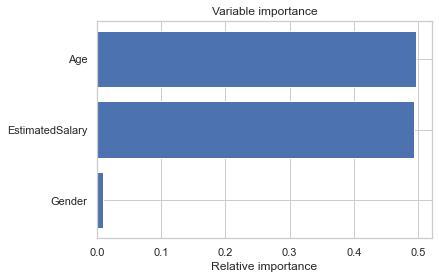

In [121]:
padding=np.arange(x_train.size/len(x_train))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features)
plt.xlabel("Relative importance")
plt.title("Variable importance")

In [122]:
x_train1=x_train[:,1:]
x_test1=x_test[:,1:]
rf1= RandomForestClassifier(n_estimators=500)
rf1.fit(x_train1,y_train)
y_pred_rf1 =rf1.predict(x_test1)

In [123]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



In [125]:
from sklearn.svm import SVC
linear_SVM=SVC(kernel='linear')
linear_SVM.fit(x_train_sc,y_train)


SVC(kernel='linear')

In [126]:
y_pred_SVM_1 = linear_SVM.predict(x_test_sc)

In [127]:
print (classification_report(y_test,y_pred_SVM_1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80

